# **Data Visualization**


In this module we will be focusing on the visualization of data.

The data set presented is in the form of a RDBMS.

We will use SQL queries to extract the data.


## Objectives


1.   Visualize the distribution of data.

2.   Visualize the relationship between two features.

3.   Visualize composition of data.

4.   Visualize comparison of data.


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-10-02 12:38:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite'

     0K .......... .......... .......... .......... ..........  0% 44.4K 13m26s
    50K .......... .......... .......... .......... ..........  0% 35.3K 15m8s
   100K .......... .......... .......... .......... ..........  0% 23.2K 18m37s
   150K .......... .......... .......... .......... ..........  0% 24.3K 20m2s
   200K .......... .......... .......... .......... ..........  0% 41.5K 18m52s
  

  6000K .......... .......... .......... .......... .......... 16% 10.0K 11m41s
  6050K .......... .......... .......... .......... .......... 17% 36.9K 11m41s
  6100K .......... .......... .......... .......... .......... 17% 34.5K 11m41s
  6150K .......... .......... .......... .......... .......... 17% 57.0K 11m38s
  6200K .......... .......... .......... .......... .......... 17% 37.2K 11m38s
  6250K .......... .......... .......... .......... .......... 17% 13.4K 11m49s
  6300K .......... .......... .......... .......... .......... 17% 20.9K 11m53s
  6350K .......... .......... .......... .......... .......... 17% 56.4K 11m50s
  6400K .......... .......... .......... .......... .......... 18% 65.2K 11m47s
  6450K .......... .......... .......... .......... .......... 18%  197K 11m42s
  6500K .......... .......... .......... .......... .......... 18%  100K 11m37s
  6550K .......... .......... .......... .......... .......... 18% 94.8K 11m33s
  6600K .......... .......... ..........

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("6b.m4_survey_data.sqlite") # open a database connection


 17150K .......... .......... .......... .......... .......... 48% 46.1K 9m41s
 17200K .......... .......... .......... .......... .......... 48% 61.0K 9m38s
 17250K .......... .......... .......... .......... .......... 48%  184K 9m35s
 17300K .......... .......... .......... .......... .......... 48% 82.5K 9m33s
 17350K .......... .......... .......... .......... .......... 48%  204K 9m30s
 17400K .......... .......... .......... .......... .......... 48% 68.3K 9m27s
 17450K .......... .......... .......... .......... .......... 48%  171K 9m25s
 17500K .......... .......... .......... .......... .......... 48% 98.8K 9m22s
 17550K .......... .......... .......... .......... .......... 49%  206K 9m19s
 17600K .......... .......... .......... .......... .......... 49%  102K 9m17s
 17650K .......... .......... .......... .......... .......... 49%  104K 9m14s
 17700K .......... .......... .......... .......... .......... 49%  102K 9m11s
 17750K .......... .......... .......... ..........

Import pandas module & matplotlib for visualizing.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [6]:
# Describing a table
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## 1. Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


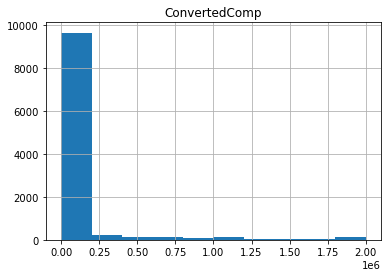

In [7]:
query="""
SELECT ConvertedComp from master
"""
ConvertedComp=pd.read_sql(query,conn)
ConvertedComp.hist()
plt.show()

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

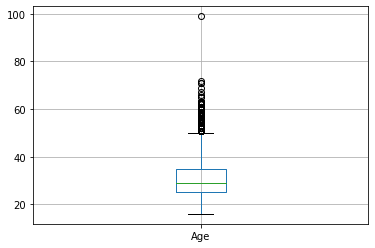

In [8]:
query="""
SELECT Age from master
"""
Age=pd.read_sql(query,conn)
Age.boxplot()

## 2. Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


,Age,WorkWeekHrs
Age,1.000000,0.265319
WorkWeekHrs,0.265319,1.000000


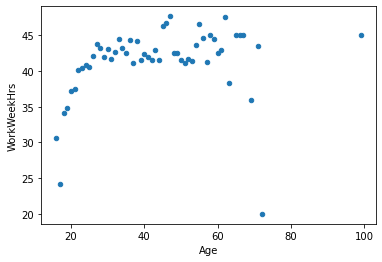

In [9]:
query="""
SELECT Age, AVG(WorkWeekHrs) as WorkWeekHrs from master
GROUP BY Age
"""
Age_vs_WorkWeekHrs=pd.read_sql(query,conn)
Age_vs_WorkWeekHrs.plot(x='Age',y='WorkWeekHrs',kind='scatter')
Age_vs_WorkWeekHrs.corr()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

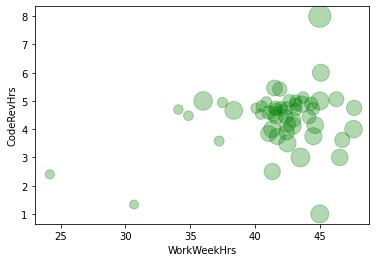

In [10]:
query="""
SELECT Age, AVG(WorkWeekHrs) as WorkWeekHrs, AVG(CodeRevHrs) as CodeRevHrs from master
GROUP BY Age
"""
WorkWeekHrs_vs_CodeRevHrs=pd.read_sql(query,conn)
WorkWeekHrs_vs_CodeRevHrs.plot(x='WorkWeekHrs',y='CodeRevHrs',kind='scatter',s=WorkWeekHrs_vs_CodeRevHrs['Age']*5,alpha=0.3,color='green')

## 3. Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


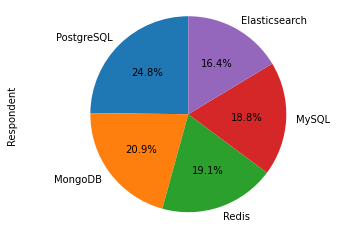

In [11]:
query="""
SELECT * from DatabaseDesireNextYear
"""
databases=pd.read_sql(query,conn)
top_5_databases=databases.groupby('DatabaseDesireNextYear').count().sort_values('Respondent',ascending=False).head(5)
top_5_databases['Respondent'].plot(kind='pie',
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   )
plt.axis('equal')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

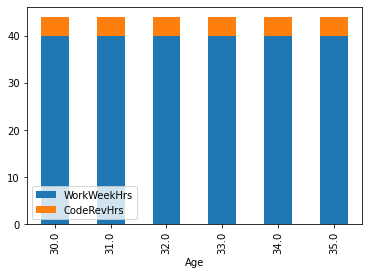

In [12]:
query="""
SELECT Age, WorkWeekHrs, CodeRevHrs from master
WHERE Age between 30 and 35
"""
stacked_WorkWeekHrs_and_CodeRevHrs=pd.read_sql(query,conn)
stacked_WorkWeekHrs_and_CodeRevHrs.groupby('Age').median().plot(kind='bar',stacked=True)

## 4. Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

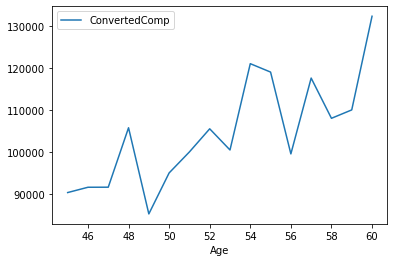

In [13]:
query="""
SELECT Age, ConvertedComp from master
WHERE Age between 45 and 60
"""
line_ConvertedComp=pd.read_sql(query,conn)
line_ConvertedComp.groupby('Age').median().plot()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


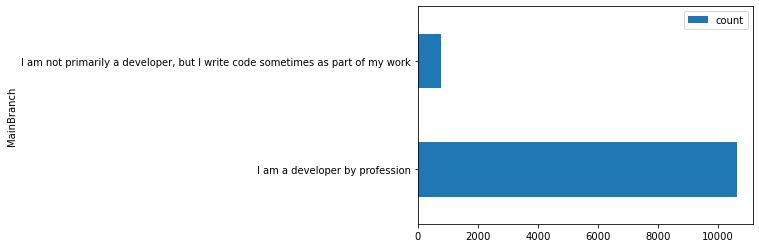

In [14]:
query="""
SELECT MainBranch, COUNT(*) as count from master
GROUP BY MainBranch
"""
bar_MainBranch=pd.read_sql(query,conn)
bar_MainBranch.plot(kind='barh',x='MainBranch')
plt.show()

Close the database connection.


In [15]:
conn.close()